In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#load PyAutocorrect Colab Notebook
%run '/content/gdrive/MyDrive/Colab Notebooks/PyAutocorrection.ipynb'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.8 MB/s eta 0:00:00


In [ ]:
!pip install ffmpeg-python

In [ ]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };            
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});
      
</script>
"""

def Get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  
  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)
  
  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

In [ ]:
#load generator colab notebook
%run '/content/gdrive/MyDrive/Colab Notebooks/LoadGenerator.ipynb'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install SpeechRecognition


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 36.6 MB/s eta 0:00:00


In [ ]:
import speech_recognition as sr

def audio_to_text(audio_data, samp_r):
    recognizer = sr.Recognizer()
    audio_file = sr.AudioData(audio_data.tobytes(), samp_r, audio_data.dtype.itemsize)
    try:
        text = recognizer.recognize_google(audio_file)
        return text
    except sr.UnknownValueError:
        print("Google Speech Recognition could not understand audio")
    except sr.RequestError as e:
        print(f"Could not request results from Google Speech Recognition service; {e}") 



In [ ]:
#generate audio
audio, SR = Get_audio()

<class 'numpy.ndarray'>
sampling rate= 48000


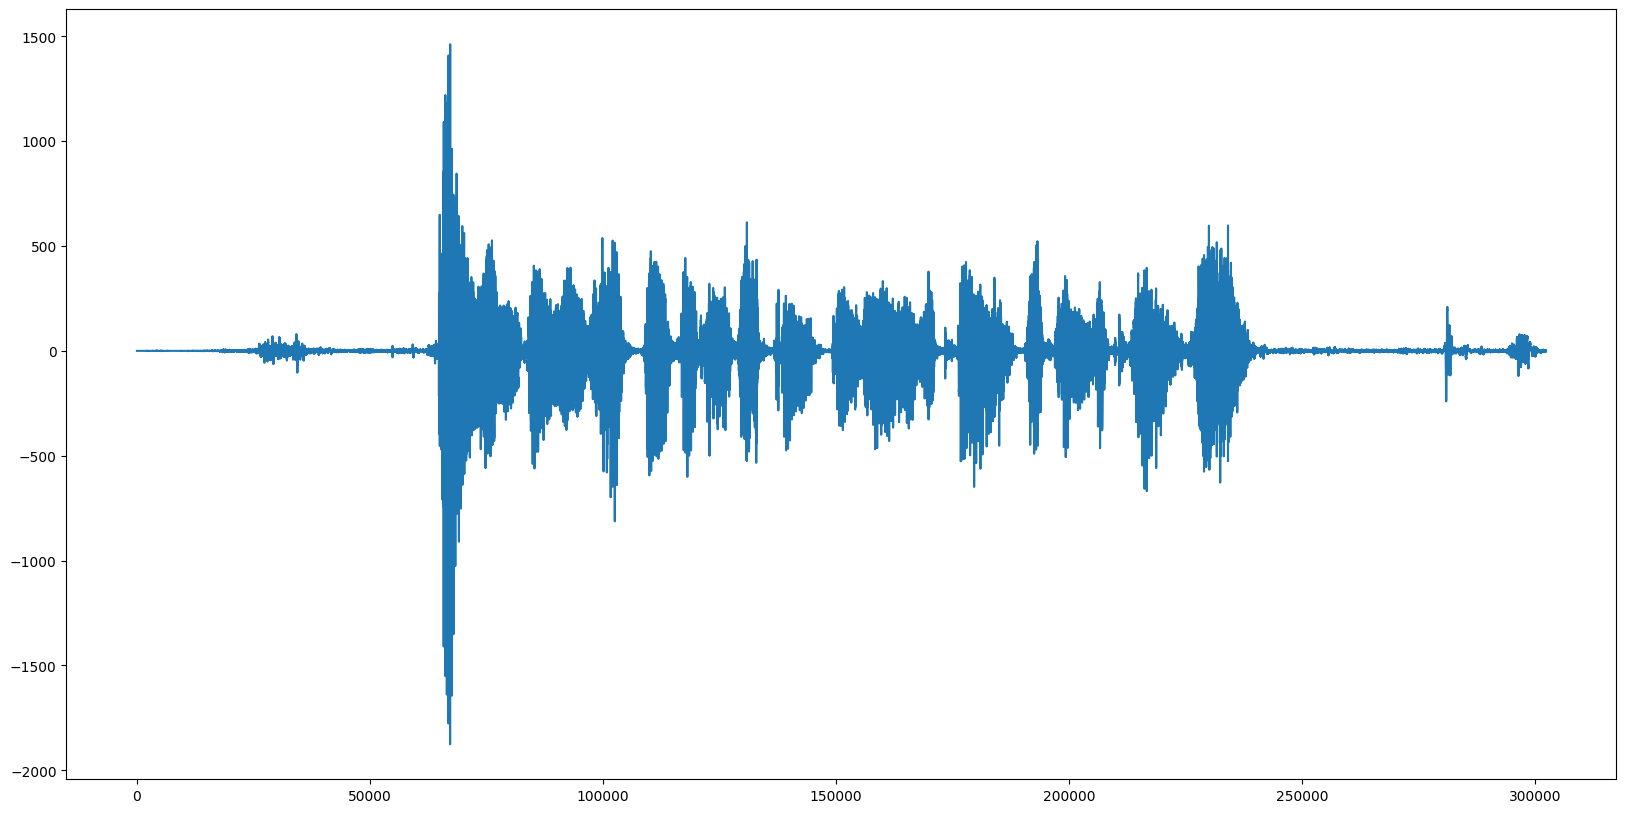

In [ ]:
import matplotlib.pyplot as plt
print(type(audio))
print("sampling rate=",SR)
plt.figure(figsize=(20,10))
plt.plot(audio)
plt.show()

In [ ]:
text = audio_to_text(audio, SR)
print(text)


I am very happy that I scored the highest marks in the class


In [ ]:
text = autocorrect(text)
text

'I am very happy that I scored the highest marks in the class.'

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 19.5 MB/s eta 0:00:00


In [ ]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
from sklearn.model_selection import train_test_split
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
tokenizer = RobertaTokenizer.from_pretrained('roberta-large')
model = RobertaForSequenceClassification.from_pretrained('/content/gdrive/MyDrive/EXAM EMOTIONS MODEL/myModel_better')

In [ ]:
#detect emotion 
def predict_emotion(text: str) -> int:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    input_encoding = tokenizer.encode_plus(text,
                                            truncation=True,
                                            padding=True,
                                            return_tensors='pt').to(device)
    model.to(device)
    outputs = model(input_ids=input_encoding['input_ids'],
                    attention_mask=input_encoding['attention_mask']).logits.to('cpu')
    predicted_label = torch.argmax(outputs, axis=1).item()
    
    # Map the predicted label to the actual emotion
    emotion_map = {0:'surprise',1:'happy', 2:'sad', 3:'anger', 4:'fear'}
    predicted_emotion = emotion_map[predicted_label]
    
    return predicted_emotion


In [ ]:
emotion = predict_emotion(text)
print(emotion)

happy


In [ ]:
generate_response(text, emotion)

"I'm so happy for you!"

In [ ]:
AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };            
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);

    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});
      
</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  
  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)
  
  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr


In [ ]:
!pip install boxprint

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install termcolor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import time
import signal
import sys
import speech_recognition as sr

class SpeechRecognitionError(Exception):
    pass

def audio_to_text(audio_data, samp_r):
    recognizer = sr.Recognizer()
    audio_file = sr.AudioData(audio_data.tobytes(), samp_r, audio_data.dtype.itemsize)
    try:
        text = recognizer.recognize_google(audio_file)
        return text
    except sr.UnknownValueError:
        raise SpeechRecognitionError("Google Speech Recognition could not understand audio")
    except sr.RequestError as e:
        raise SpeechRecognitionError(f"Could not request results from Google Speech Recognition service; {e}")

def signal_handler(signal, frame):
    print("\nThank you for using the chatbot. Exiting program...\n")
    sys.exit(0)

signal.signal(signal.SIGINT, signal_handler)

print("Hey user! How may I assist you?")

while True:
    try:
        audio, SR = get_audio()
        time.sleep(2)
        text = audio_to_text(audio, SR)
    except SpeechRecognitionError:
        print("\nSorry, I couldn't understand what you said. Please try again.\n")
        continue

    if text.lower() in ['stop', 'quit', 'exit', 'end', 'bye','goodbye','close']:
        print("\nThank you for using the chatbot. Exiting program...\n")
        break
    else:
        emotion = predict_emotion(text)
        response = generate_response(text, emotion)
        print("\n" + "-"*50)
        print(response.center(50))
        print("-"*50 + "\n")


Hey user! How may I assist you?



--------------------------------------------------
        Great job! Keep up the good work!         
--------------------------------------------------




--------------------------------------------------
I'm sorry to hear that you didn't do well on one of your papers. It's important to remember that everyone has off days and that you shouldn't be too hard on yourself. Instead, focus on what you can do to improve for next time. If you need help, don
--------------------------------------------------




--------------------------------------------------
I'm sorry to hear that your teacher is leaving tonight. I hope everything goes okay for you.
--------------------------------------------------




--------------------------------------------------
If you're close to getting something wrong, that means you're doing pretty well! Keep up the good work.
--------------------------------------------------




Thank you for using the chatbot. Exiting program...



SystemExit: ignored

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
import time
import signal
import sys
import speech_recognition as sr

class SpeechRecognitionError(Exception):
    pass

def audio_to_text(audio_data, samp_r):
    recognizer = sr.Recognizer()
    audio_file = sr.AudioData(audio_data.tobytes(), samp_r, audio_data.dtype.itemsize)
    try:
        text = recognizer.recognize_google(audio_file)
        return text
    except sr.UnknownValueError:
        raise SpeechRecognitionError("Google Speech Recognition could not understand audio")
    except sr.RequestError as e:
        raise SpeechRecognitionError(f"Could not request results from Google Speech Recognition service; {e}")

def signal_handler(signal, frame):
    print("\nThank you for using the chatbot. Exiting program...\n")
    sys.exit(0)

signal.signal(signal.SIGINT, signal_handler)

print("Hey user! How may I assist you?")

while True:
    try:
        audio, SR = get_audio()
        time.sleep(2)
        text = audio_to_text(audio, SR)
    except SpeechRecognitionError:
        print("\nSorry, I couldn't understand what you said. Please try again.\n")
        continue

    if text.lower() in ['stop', 'quit', 'exit', 'end', 'bye','goodbye','close']:
        print("\nThank you for using the chatbot. Exiting program...\n")
        break
    else:
        emotion = predict_emotion(text)
        response = generate_response(text, emotion)
        print("\n" + "-"*50)
        print(text)
        print("\n" + "-"*50)
        print("\n" + "-"*50)
        print(response.center(50))
        print("-"*50 + "\n")


Hey user! How may I assist you?



Thank you for using the chatbot. Exiting program...



SystemExit: ignored

In [ ]:
import time
import signal
import sys
import speech_recognition as sr

class SpeechRecognitionError(Exception):
    pass

def audio_to_text(audio_data, samp_r):
    recognizer = sr.Recognizer()
    audio_file = sr.AudioData(audio_data.tobytes(), samp_r, audio_data.dtype.itemsize)
    try:
        text = recognizer.recognize_google(audio_file)
        return text
    except sr.UnknownValueError:
        raise SpeechRecognitionError("Google Speech Recognition could not understand audio")
    except sr.RequestError as e:
        raise SpeechRecognitionError(f"Could not request results from Google Speech Recognition service; {e}")

def signal_handler(signal, frame):
    print("\nThank you for using the chatbot. Exiting program...\n")
    sys.exit(0)

signal.signal(signal.SIGINT, signal_handler)

print("Hey user! How may I assist you?")

while True:
    try:
        audio, SR = get_audio()
        time.sleep(2)
        text = audio_to_text(audio, SR)
    except SpeechRecognitionError:
        print("\nSorry, I couldn't understand what you said. Please try again.\n")
        continue

    if text.lower() in ['stop', 'quit', 'exit', 'end', 'bye','goodbye','close']:
        print("\nThank you for using the chatbot. Exiting program...\n")
        break
    else:
        emotion = predict_emotion(text)
        response = generate_response(text, emotion)
        print("\n" + "-"*50)
        print(response.center(50))
        print("-"*50 + "\n")


Hey user! How may I assist you?



--------------------------------------------------
I am very happy to hear that you have scored the highest marks in this examination. Congratulations!
--------------------------------------------------




--------------------------------------------------
I'm sorry to hear that your examination didn't go well. I hope you're doing okay.
--------------------------------------------------




Thank you for using the chatbot. Exiting program...

